In [1]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.19 GB, difference +0.19 GB
scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [3]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [4]:
#load data with leiden
#home_dir = os.path.expanduser("~")
current_directory = os.getcwd()
adata = sc.read_h5ad(current_directory+"/backups/bc2_bc3_leiden_1.4_sub_v1_95563x2500_240729_18h41.h5ad")


In [6]:
adata.layers["counts"]

<95563x2500 sparse matrix of type '<class 'numpy.float32'>'
	with 12405625 stored elements in Compressed Sparse Row format>

In [7]:
adata = adata.raw.to_adata()

In [9]:
# Saving raw (original) counts to layer
adata.layers["counts"] = adata.X.copy()

# Save log-norm into .X
#normalize data
sc.pp.normalize_per_cell(adata, counts_per_cell_after = 1e4) # n_counts is created
#logaritmize data
sc.pp.log1p(adata)

# So now we have: 
# raw counts in layer "counts", log-norm counts in .X


normalizing by total count per cell
    finished (0:00:18): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [11]:
# saving raw recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/leiden_1.1_sub_rec_log_norm_v3_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240523_BB2/backups/leiden_1.1_sub_rec_log_norm_v3_64656x37733_240605_10h56.h5ad


In [ ]:
#adata.uns["log1p"]["base"] = None
sc.tl.rank_genes_groups(adata, "leiden_1.4_sub", method = "wilcoxon", use_raw = False)

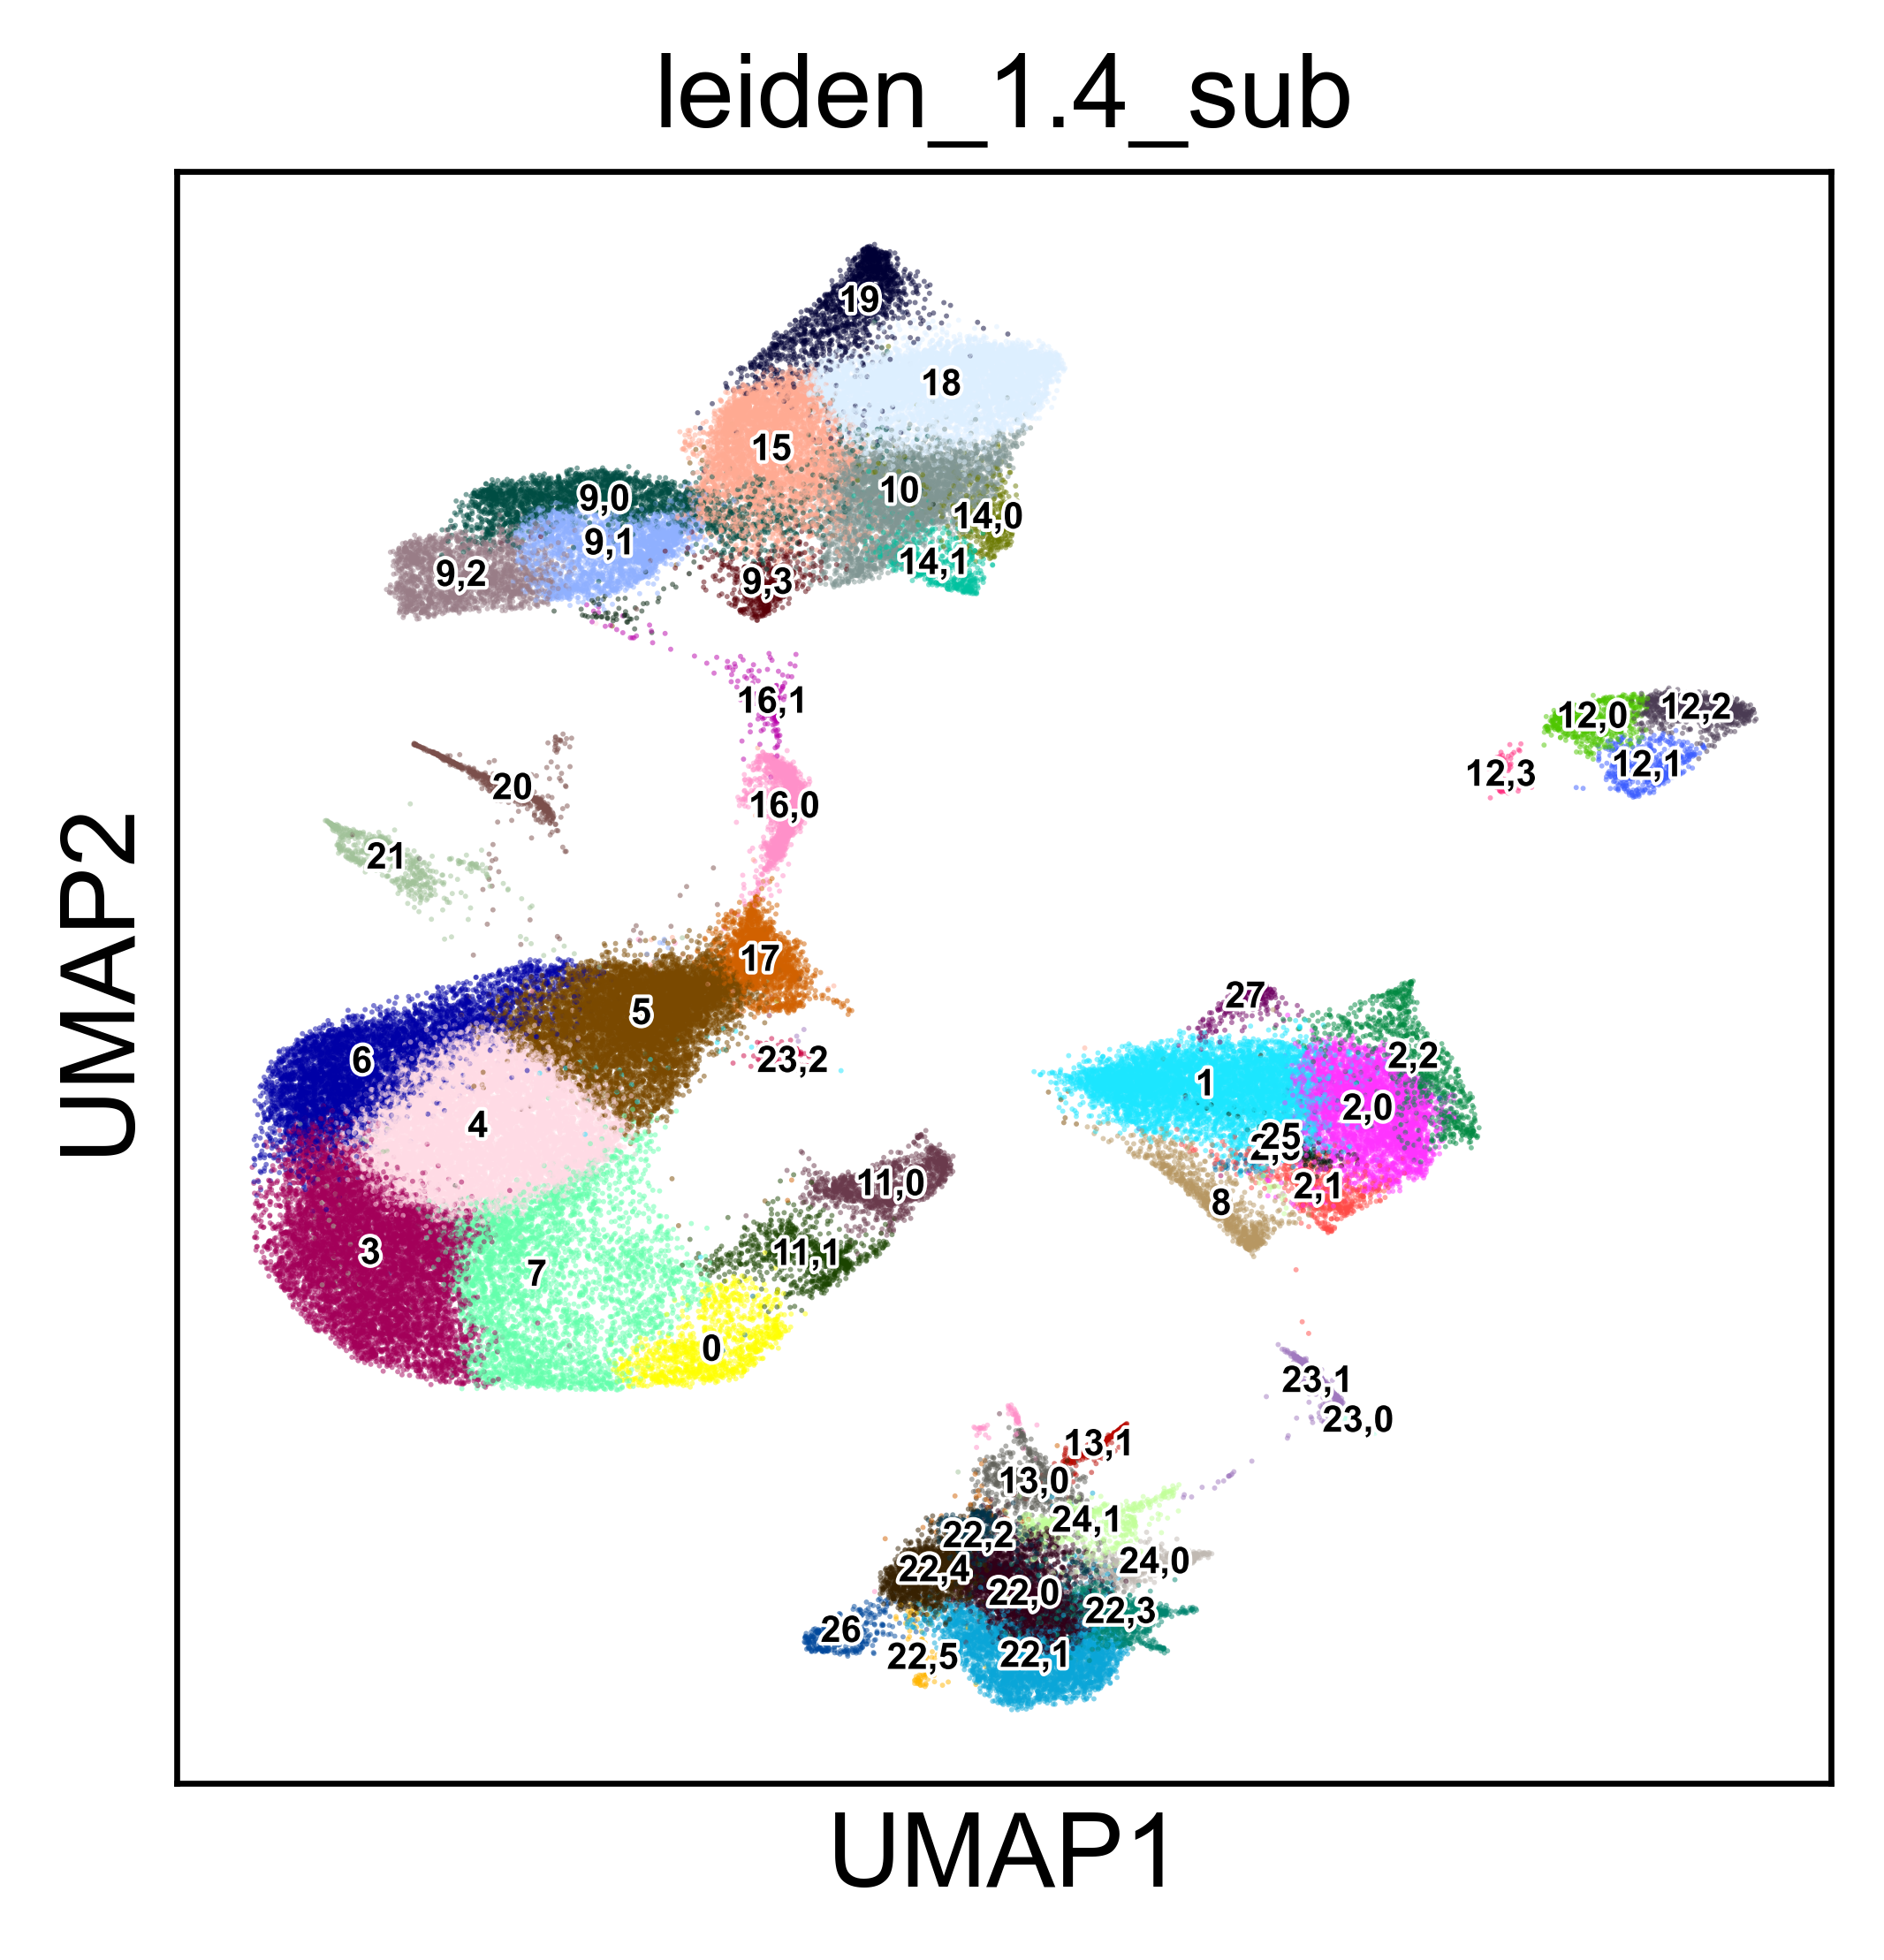

In [12]:
sc.pl.umap(adata, color = ["leiden_1.4_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [13]:
# saving raw recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/bb1_bb2_leiden_1.4_sub_rec_log_norm_DGE_v1_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb1_bb2_leiden_1.4_sub_rec_log_norm_DGE_v1_95563x37733_240729_18h52.h5ad
